# Simple Harmonic Oscillators (part 1.)

Consider a mass attached to a spring lying on a frictionless surface as shown in the figure. 

![basic shm](images/SHM.svg)</br>




The resotoring force on the mass is directly proportional to the extension of the spring so :

$$
m\frac{d^2x}{dt^2}=-kx
$$

Where $k$ is the spring constant for that spring.

This can be rewritten as 

$$
\frac{d^2x}{dt^2} = - \omega^2 x
$$

where $\omega= \sqrt{k/m}$


**Write this second order differentional equation as a series of first order differential equations in the box below.**

In [3]:
"""
Original equation: d^2x/dt^2 = -omega^2x

dv/dt = -(k/m)x
dx/dt = v

"""

'\nOriginal equation: d^2x/dt^2 = -omega^2x\n\ndv/dt = a\ndx/dt = v\n\n'

**Now write a simulation of a similar system with a spring constant $18Nm^{-1}$ and a mass of 0.5 Kg. Plot both the position and the velocity of the mass if intitally you extend the spring by 10cm. Run your simulation for 10s. You should think about what is happening to the energy in this system**

   x values        v values    
[[ 1.00000000e-01  0.00000000e+00]
 [ 9.99999998e-02 -3.60000360e-05]
 [ 9.99999993e-02 -7.20000718e-05]
 ...
 [-9.52447022e-02  1.82816520e-01]
 [-9.52428739e-02  1.82850808e-01]
 [-9.52410452e-02  1.82885095e-01]]


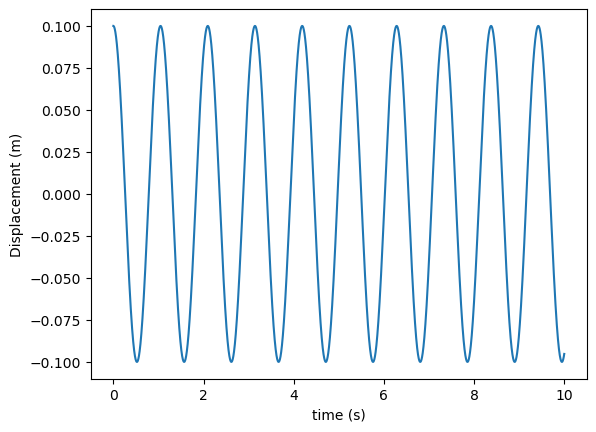

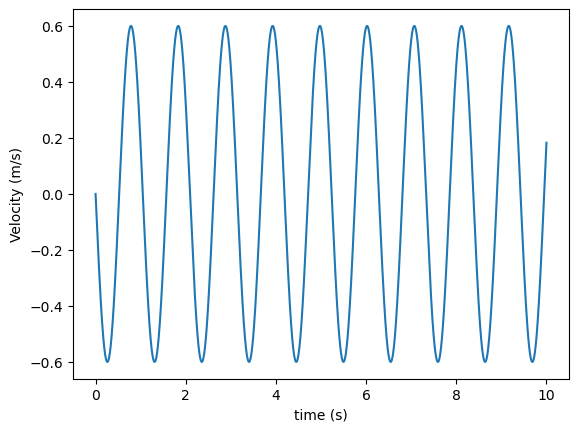

In [11]:
import scipy as sp
import numpy as np
import pylab as pl
import scipy.integrate as spi

k = 18  # in Nm^-1
m = 0.5  # in kg
x0 = 0.1  #  starting displacement, in metres

# Note for later: Run simulation for 10 seconds

def f(values_at_t, t):
  x = values_at_t[0]
  v = values_at_t[1]
  
  a = -(k/m) * x
  return [v,a]
#returns differentiated values


t=np.linspace(0.,10.,10**6) # solving every tenth of a second - more than is needed. You could have used arange here but try looking uplinspace.

# set initial conditions going up at 50 ms^-1 starting at ground level
values_at_0 = [x0, 0]


soln=spi.odeint(f,values_at_0, t) # function name, initial conditions and timesteps

print("   x values   ", "    v values    ")
print(soln)

x_all=soln[:,0]
v_all=soln[:,1]


pl.figure(0)
pl.plot(t,x_all)
pl.xlabel("time (s)")
pl.ylabel("Displacement (m)")

pl.figure(1)
pl.plot(t,v_all)
pl.xlabel("time (s)")
pl.ylabel("Velocity (m/s)")

pl.show()

## Damped Oscillators
Now you replace the frictionless surface with different surfaces with different amounts of friction. However in each case the friction is proportional to the velocity so the equation of motion becomes:

$$
m\frac{d^2x}{dt^2} +b\frac{dx}{dt} +k x=0
$$

where b is a constant for the particular surface.
This is often written as:

$$
\frac{d^2x}{dt^2} +\gamma\frac{dx}{dt}+  \omega^2 x =0
$$

**Modify your simulations to include this damping. Investigate how the motion changes with different values of $b$. Specifically, try values of $b$ that are less than 6, $b=6$ and values for $b$ that are much greater than 6. You should try to describe what you see and decide whether or not the motion is oscillatory or not. Keep the plots as they may be useful in your presentation. You should think about what is happening to the energy in this system**


   x values        v values    
[[ 1.00000000e-01  0.00000000e+00]
 [ 9.99999998e-02 -3.59928377e-05]
 [ 9.99999993e-02 -7.19712809e-05]
 ...
 [ 1.02344076e-05 -9.42808499e-06]
 [ 1.02343134e-05 -9.42799827e-06]
 [ 1.02342193e-05 -9.42791155e-06]]


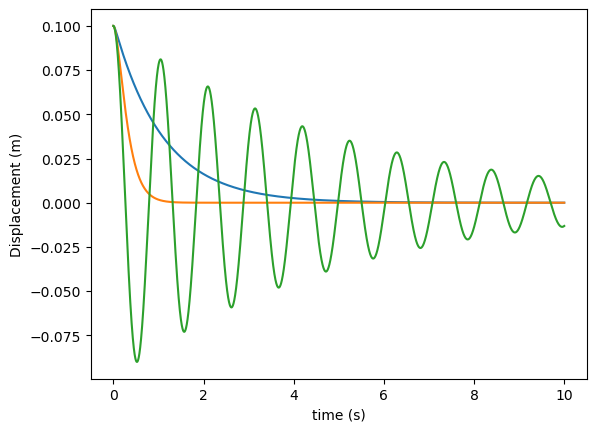

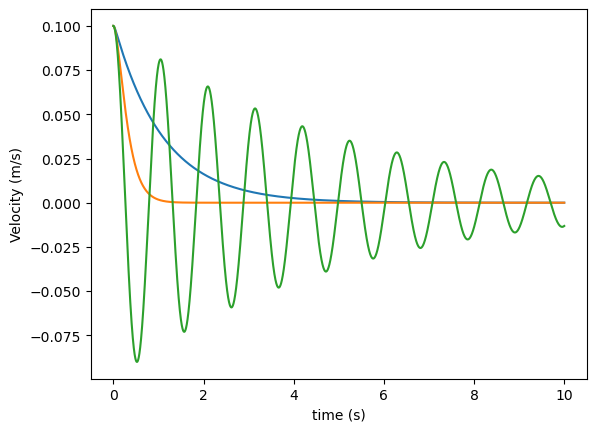

In [17]:
import scipy as sp
import numpy as np
import pylab as pl
import scipy.integrate as spi

k = 18  # in Nm^-1
m = 0.5  # in kg
x0 = 0.1  #  starting displacement, in metres

# Adding friction related variables



# Note for later: Run simulation for 10 seconds

def f(values_at_t, t):
  b = 20  
  x = values_at_t[0]
  v = values_at_t[1]
  
  a = (-k*x/m)-b*v/m
  return [v,a]

def g(values_at_t, t):
  b = 6
  x = values_at_t[0]
  v = values_at_t[1]
  
  a = (-k*x/m)-b*v/m
  return [v,a]

def h(values_at_t, t):
  b = 0.2
  x = values_at_t[0]
  v = values_at_t[1]
  
  a = (-k*x/m)-b*v/m
  return [v,a]

t=np.linspace(0.,10.,10**6) # solving every tenth of a second - more than is needed. You could have used arange here but try looking uplinspace.

# set initial conditions going up at 50 ms^-1 starting at ground level
values_at_0 = [x0, 0]


soln=spi.odeint(f,values_at_0, t) # function name, initial conditions and timesteps
soln1=spi.odeint(g,values_at_0, t) # function name, initial conditions and timesteps
soln2=spi.odeint(h,values_at_0, t) # function name, initial conditions and timesteps

print("   x values   ", "    v values    ")
print(soln)

x_all=soln[:,0]
v_all=soln[:,1]
x_all1=soln1[:,0]
v_all1=soln1[:,1]
x_all2=soln2[:,0]
v_all2=soln2[:,1]

pl.figure(0)
pl.plot(t,x_all)
pl.plot(t,x_all1)
pl.plot(t,x_all2)
pl.xlabel("time (s)")
pl.ylabel("Displacement (m)")

pl.figure(1)
pl.plot(t,x_all)
pl.plot(t,x_all1)
pl.plot(t,x_all2)
pl.xlabel("time (s)")
pl.ylabel("Velocity (m/s)")

pl.show()